<a href="https://colab.research.google.com/github/tffnyzhng/SeoulBikes/blob/main/PROJETPYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PROJET PYTHON




##Importation de librairies

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

On défini un thème pour nos graphiques dans ce notebook


In [10]:
sns.set_theme(style="whitegrid", palette="pastel")

## Importation du dataset SeoulBikeData

In [11]:
bike=pd.read_csv('SeoulBikeData.csv',encoding='ISO-8859-1')

In [12]:
bike.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [13]:
bike.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

##Data Exploration et Preprocessing

In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [15]:
bike.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [16]:
print(" Ce data set contient {} lignes et {} colonnes.".format(bike.shape[0],bike.shape[1]))

 Ce data set contient 8760 lignes et 14 colonnes.


Colonnes et leur unité contenues dans le data set (source :https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand#) :



*  Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)



Le data set Seoul Bike Sharing Demand est un jeu de données contenant le nombre de vélos publics loués à chaque heure dans le système de vélos en libre-service de Séoul, avec les données météorologiques et les informations sur les vacances correspondantes.

In [17]:
bike.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [18]:
bike.duplicated().sum()

0

Il semblerait que le dataset soit déjà nettoyé ou trés bien construit.

In [19]:
bike.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

La colonne Date est de type objet, on la convertit en format datetime puis, on la sépare en plusieurs catégories (Year,Month, Weekday) pour pouvoir les manier plus facilement.

In [20]:
bike['Date'] = pd.to_datetime(bike['Date'], format="%d/%m/%Y")

In [21]:
bike['Year']=bike['Date'].dt.year
bike['Month']=bike['Date'].dt.month_name()
bike['Weekday']=bike['Date'].dt.day_name()

In [22]:
bike=bike.drop(['Date'], axis=1)

In [23]:
#bike['Hour']=bike['Hour'].astype('object')
bike['Year']=bike['Year'].astype('object')

In [24]:
bike.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
Year                          object
Month                         object
Weekday                       object
dtype: object

On ajoute une colonne 'Daytime' en transformant la colonne des heures en une colonne correpondant au moment de la journée (jour/nuit).

In [25]:
bike['Daytime']=bike['Hour'].apply(lambda x : 'Night' if (x>=19 or x<=6) else( 'Day'))

In [26]:
bike.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Year  \
0           0.0            0.0  Winter  No Holiday             Yes  2017   
1           0.0            0.0  Winter  No Holiday             Yes  2017   
2           0.0            0.0  Winter  No Holiday             Yes  2017   
3           0.0            0.0  Winter  No Holiday             Yes  2017   
4           0.0            0.0  Winter  No Holiday             Yes  2017   

      Month Weekday Daytime  
0  December  Friday   Night  
1  December  Friday   Night  
2  December  Friday   Night  
3  December  Friday   Night  
4  December  Friday   Night

##Visualisation

On sépare les colonnes selon leur type ( numérique/ catégorique) dans deux variables, cela nous facilitera la tache pour la phase de visualisation.

In [27]:
numeric= bike.select_dtypes(exclude='object')
categorical=bike.select_dtypes(include='object')

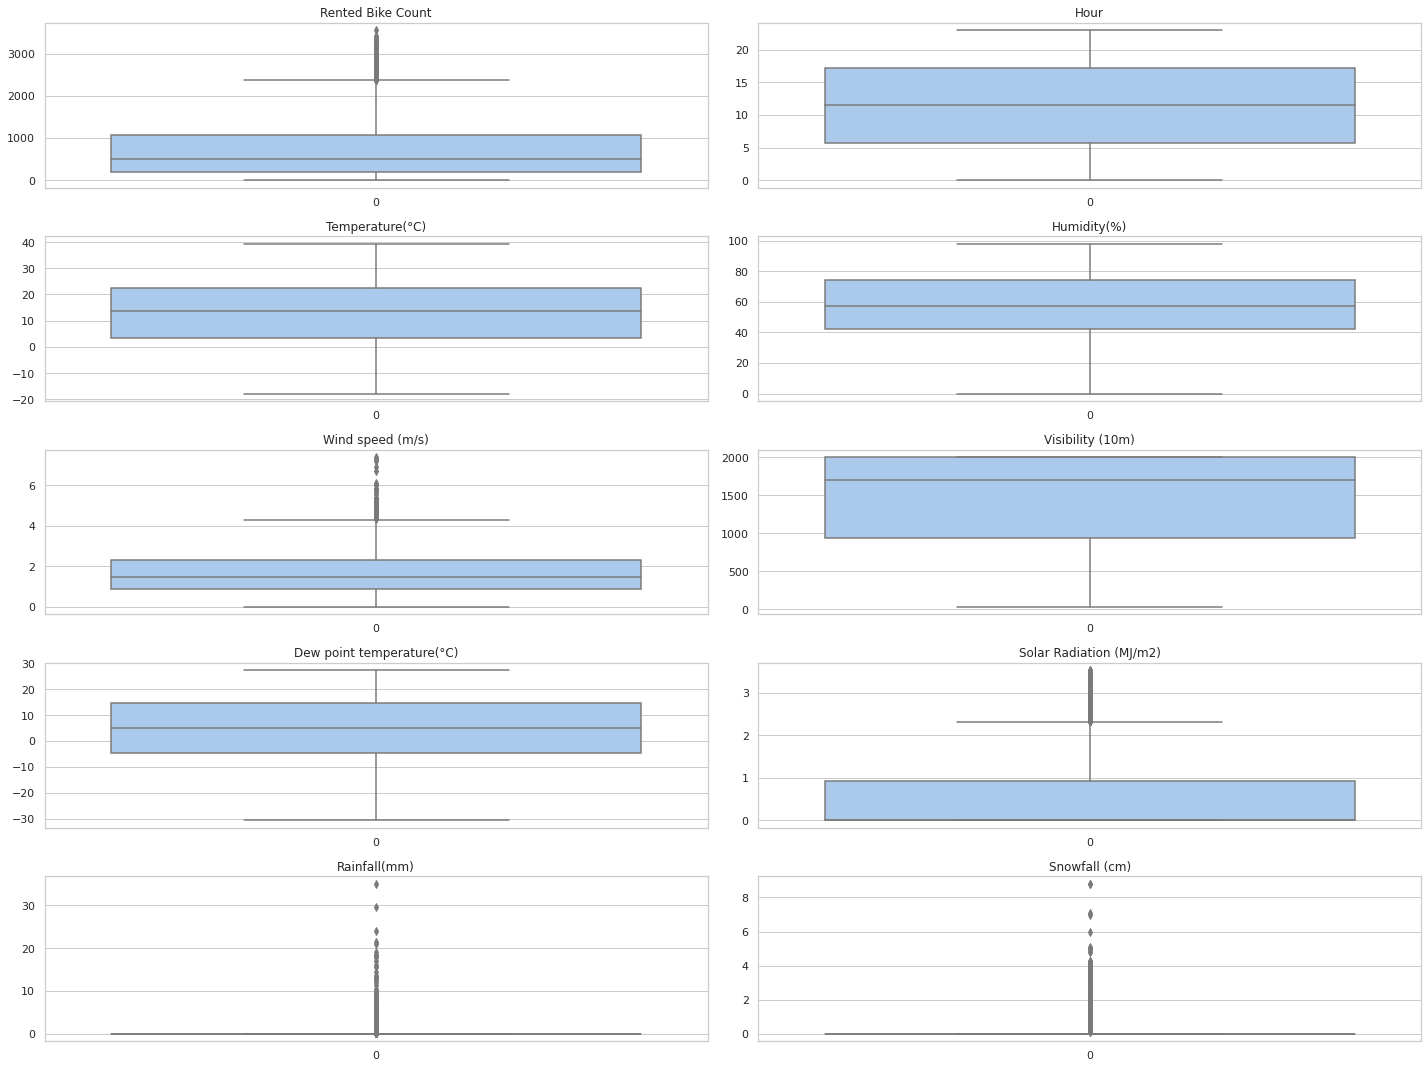

In [28]:
n = 1
plt.figure(figsize=(20,15))

for i in numeric.columns:
  plt.subplot(5,2,n)
  n=n+1
  sns.boxplot(data=bike[i])
  plt.title(i)
  plt.tight_layout()
plt.show()

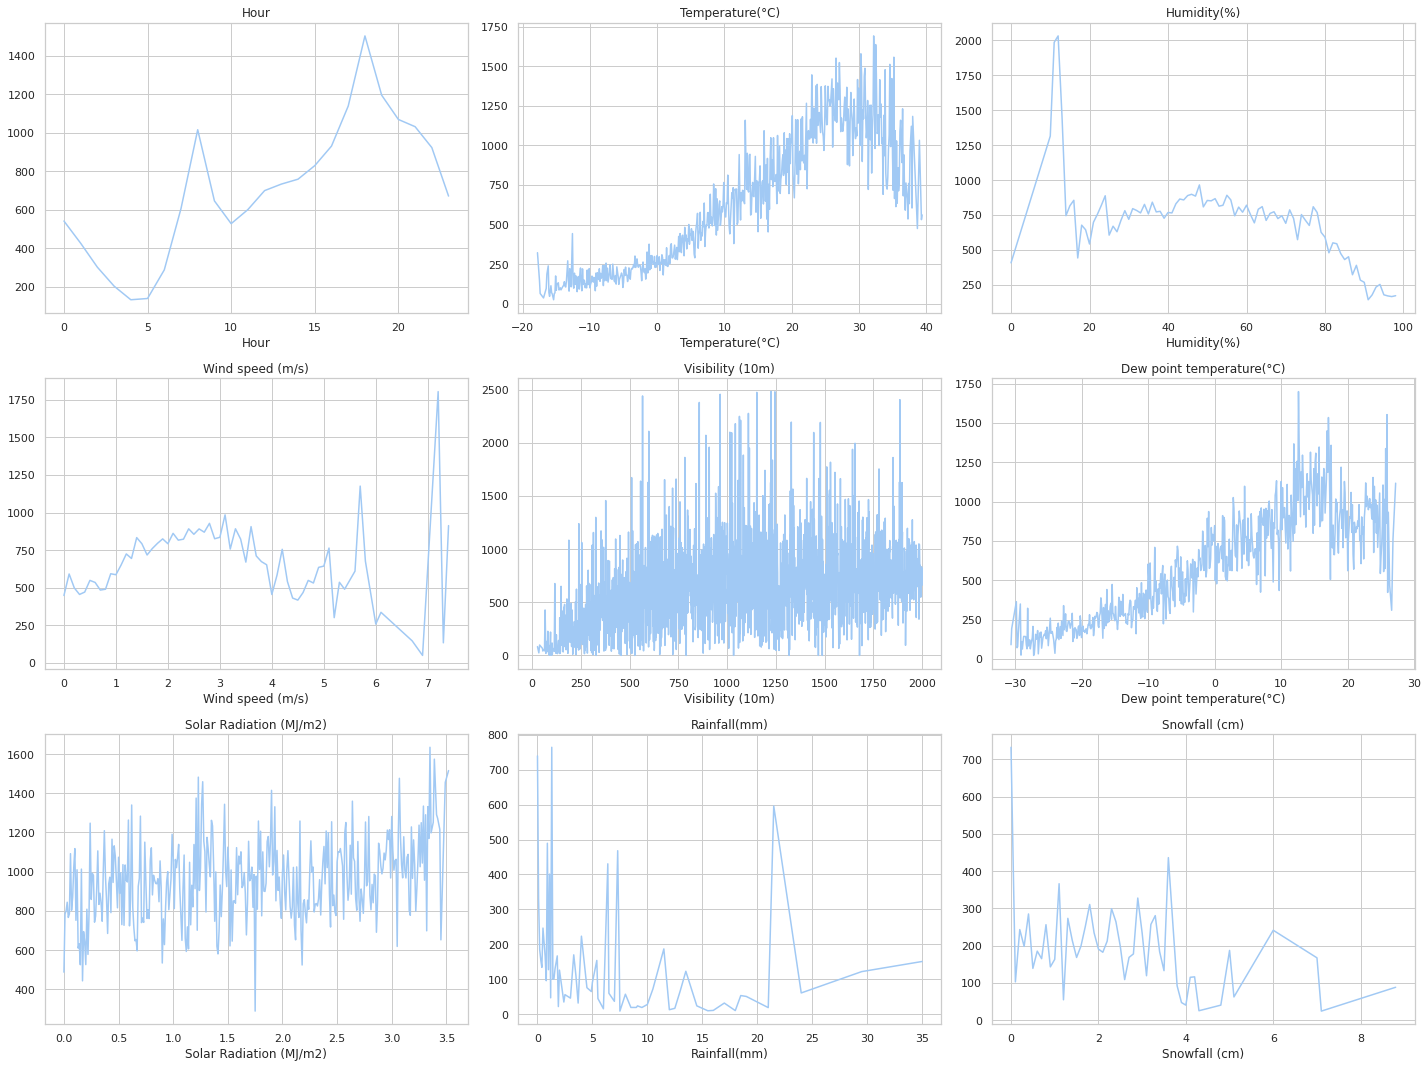

In [29]:
n = 1
plt.figure(figsize=(20,15))


for i in numeric.columns.drop('Rented Bike Count'):
  plt.subplot(3,3,n)
  n=n+1
  bike.groupby(i).mean()['Rented Bike Count'].plot()
  plt.title(i)
  plt.tight_layout()

In [30]:
bike.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False)

Seasons
Summer    2283234
Autumn    1790002
Spring    1611909
Winter     487169
Name: Rented Bike Count, dtype: int64

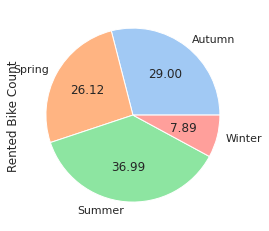

In [31]:
bike.groupby('Seasons').sum()['Rented Bike Count'].plot.pie(autopct="%.2f")

In [32]:
bike.groupby('Weekday').sum()['Rented Bike Count'].sort_values(ascending=False)

Weekday
Friday       950334
Wednesday    923956
Monday       911743
Saturday     885492
Thursday     861999
Tuesday      858596
Sunday       780194
Name: Rented Bike Count, dtype: int64

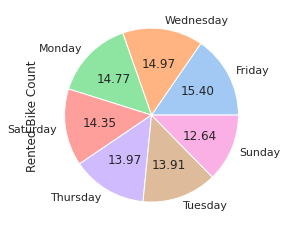

In [33]:
bike.groupby('Weekday').sum()['Rented Bike Count'].sort_values(ascending=False).plot.pie(autopct="%.2f")

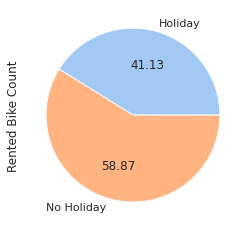

In [34]:
bike.groupby('Holiday').mean()['Rented Bike Count'].plot.pie(autopct="%.2f")

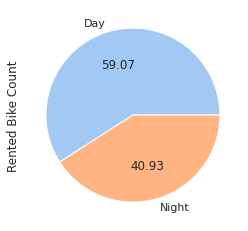

In [35]:
bike.groupby('Daytime').mean()['Rented Bike Count'].plot.pie(autopct="%.2f")

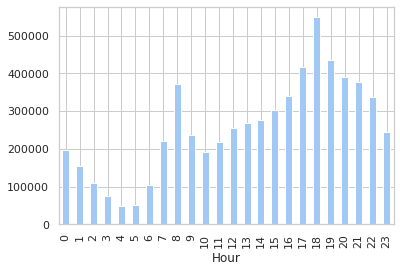

In [36]:
bike.groupby('Hour').sum()['Rented Bike Count'].plot.bar()

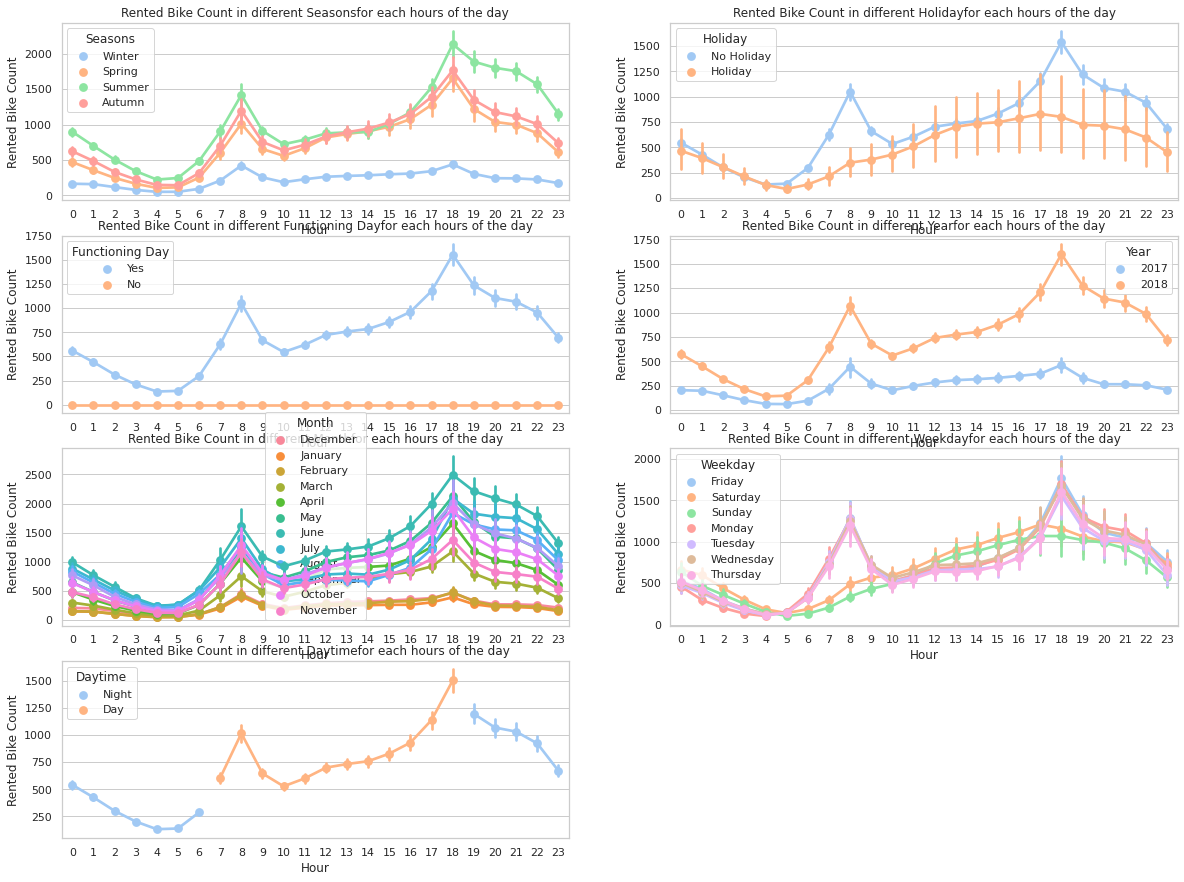

In [37]:
plt.figure(figsize=(20,15))
n=1
for i in categorical.columns:
  plt.subplot(4,2,n)
  n=n+1
  sns.pointplot(x=bike["Hour"], y=bike['Rented Bike Count'],hue=bike[i])
  plt.title(f"Rented Bike Count in different {i}for each hours of the day")
plt.show()

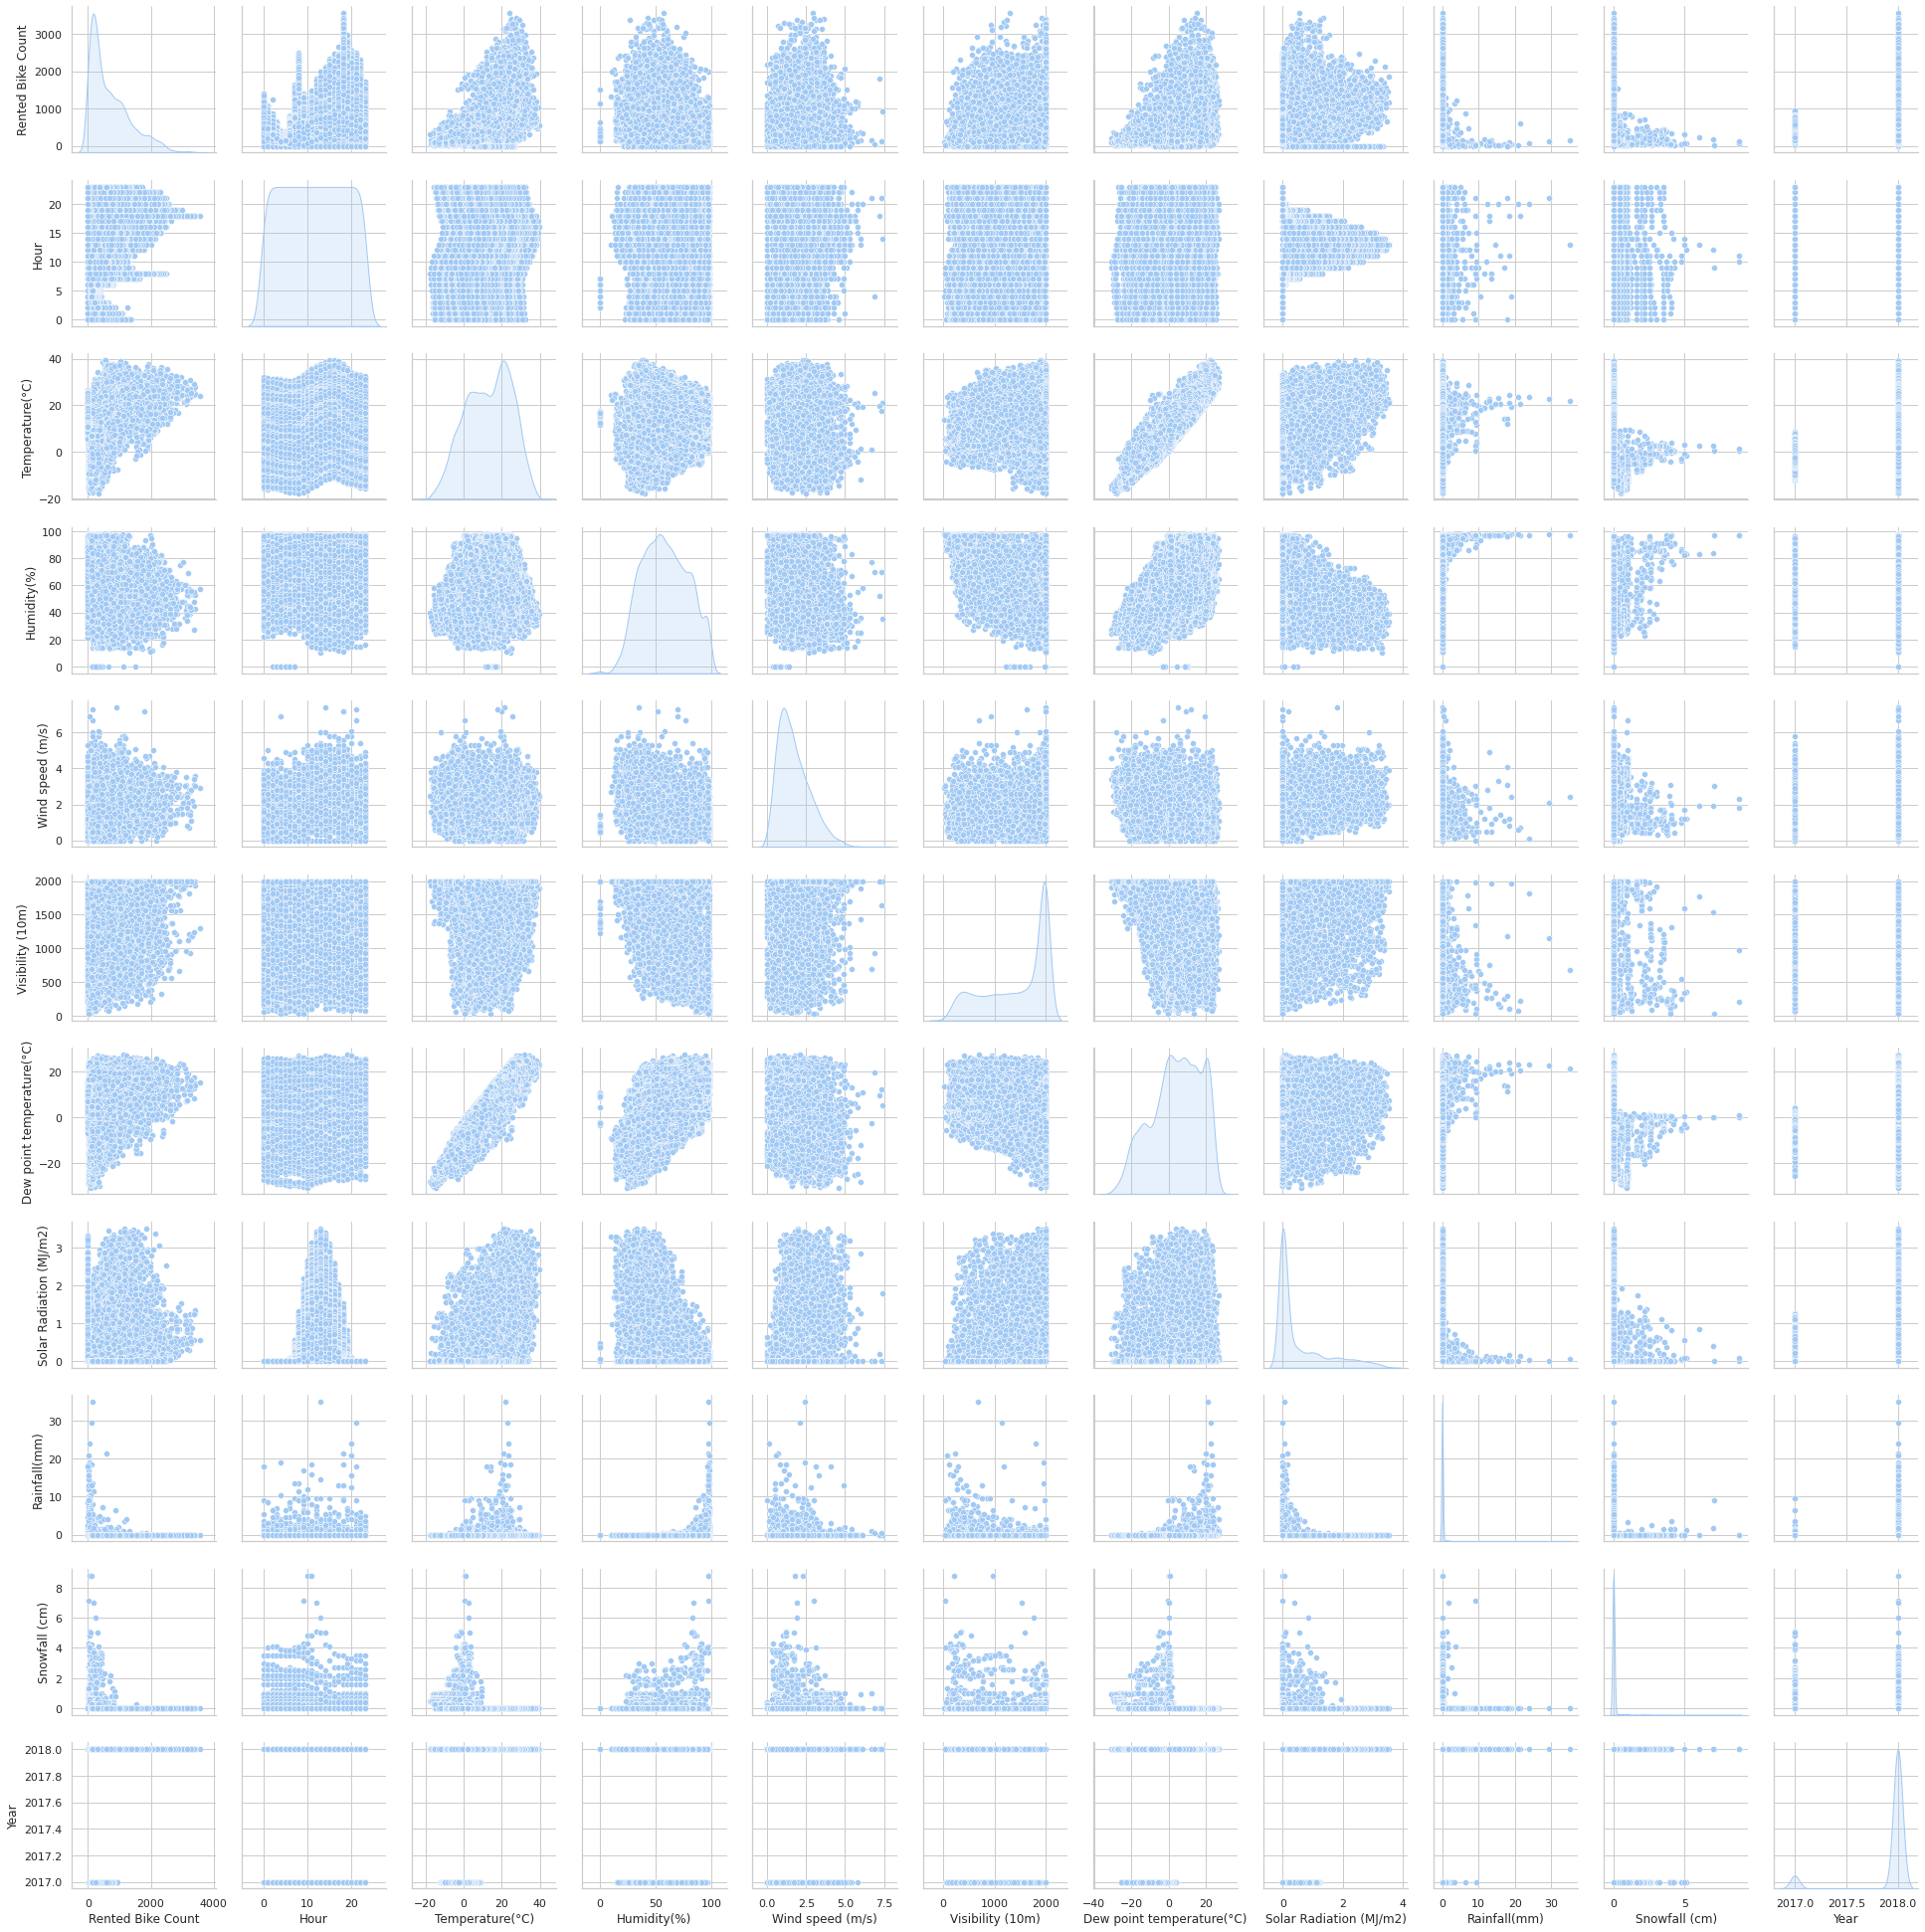

In [38]:
sns.pairplot(bike,diag_kind='kde')

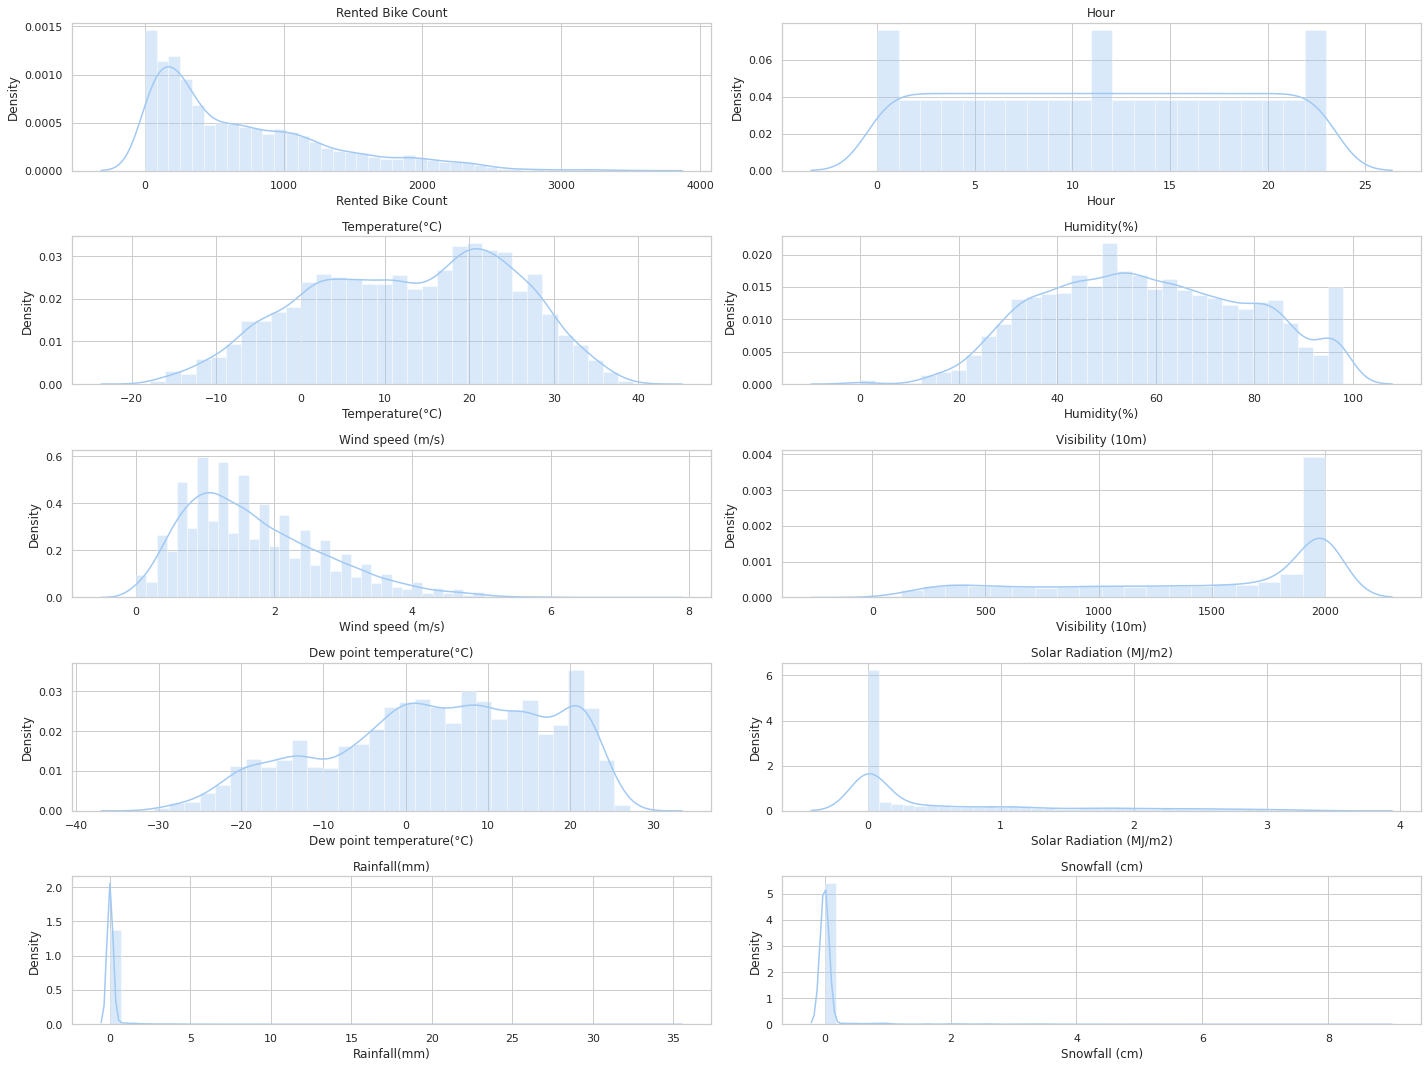

In [39]:
n = 1
plt.figure(figsize=(20,15))


for i in numeric.columns:
  plt.subplot(5,2,n)
  n=n+1
  sns.distplot(bike[i])
  plt.title(i)
  plt.tight_layout()



Nous affichons pour chaque colonne une distribution simple, ce qui nous permet de verifier si les données suivent une distribution normale ou non. Si elles ne semble pas suivre une distribution normale, nous la/les normaliserons.

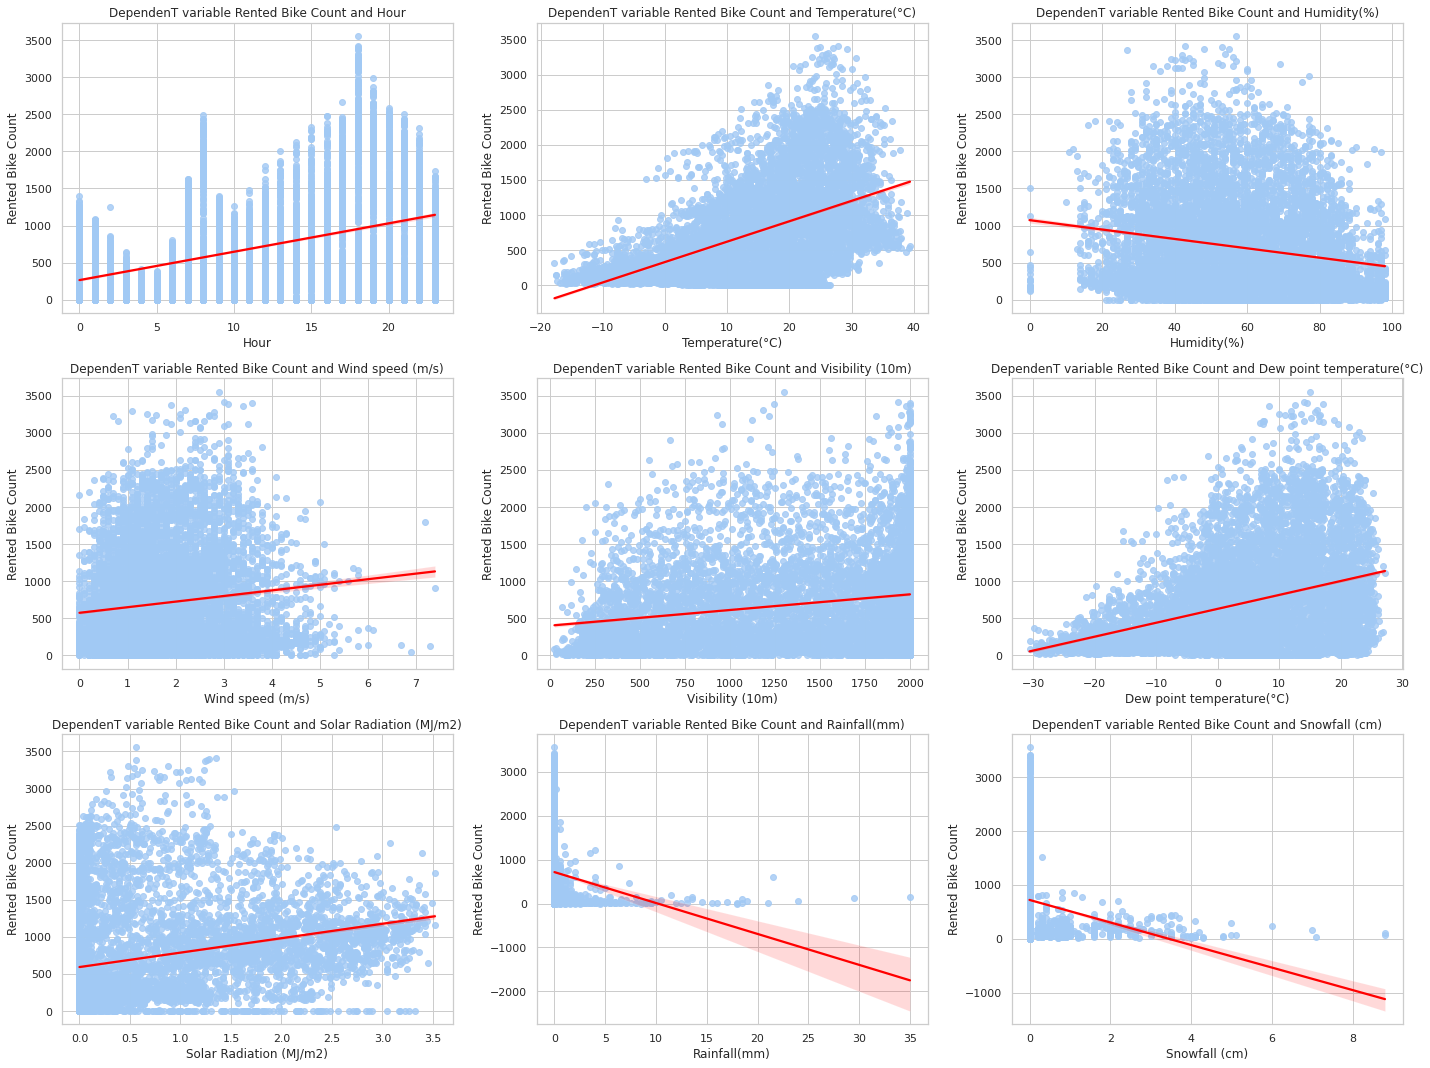

In [40]:
n=1
plt.figure(figsize=(20,15))
for i in numeric.columns.drop('Rented Bike Count'):
  plt.subplot(3,3,n)
  n+=1
  sns.regplot(bike[i], bike['Rented Bike Count'], line_kws={"color": "red"})
  plt.title(f'DependenT variable Rented Bike Count and {i}')
  plt.tight_layout()
plt.show()

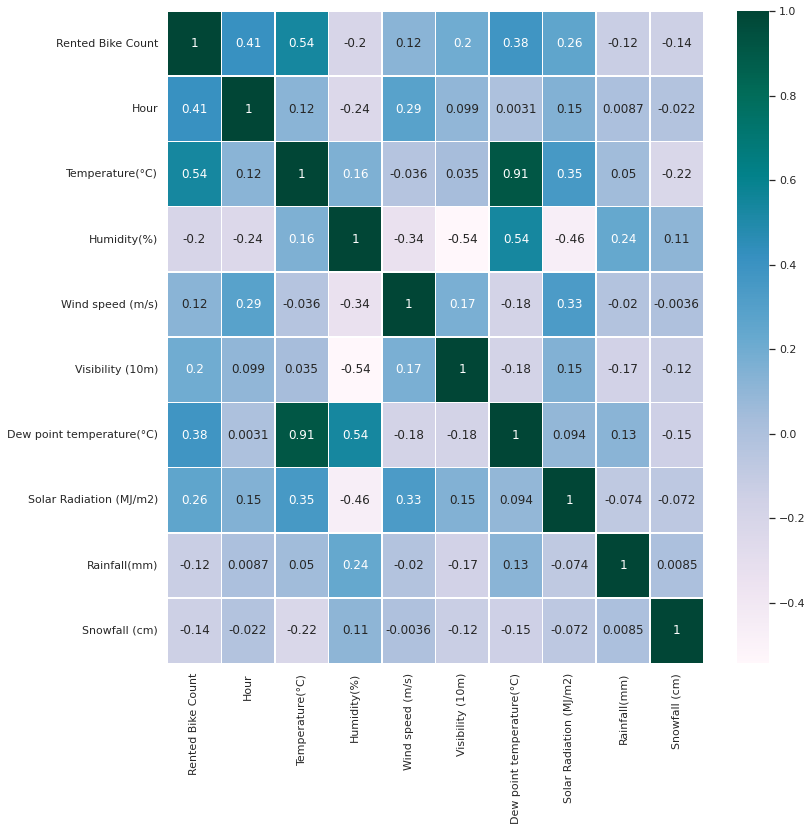

In [41]:
corrMat = bike.corr()
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(corrMat, annot=True, linewidths=.5, ax=ax, cmap='PuBuGn')
plt.show()


#grosse corrélation e 

In [42]:
df=bike.drop(['Dew point temperature(°C)'], axis=1)

Text(0.5, 1.0, 'Features Correlation to Rented Bike Count (target)')

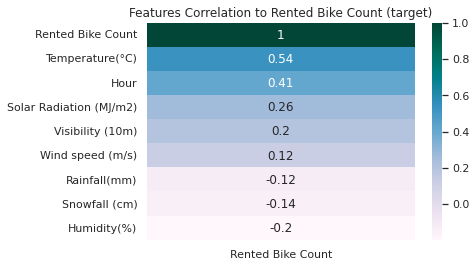

In [43]:
corrMat = df.corr()
heatmap = sns.heatmap(corrMat[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False),annot=True,cmap='PuBuGn')
heatmap.set_title('Features Correlation to Rented Bike Count (target)')

On voit que les plus grosses corélations sont au niveau de la température et la radiation solaire.

##Modeling

In [79]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

from sklearn.model_selection import learning_curve


In [80]:
X=df.drop(['Rented Bike Count','Seasons','Holiday','Daytime','Functioning Day','Weekday','Month', 'Year'],axis =1)
Y=df['Rented Bike Count']

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [82]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6570, 8), (2190, 8), (6570,), (2190,))

In [83]:
X_train.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
1269    21             -1.8           85               2.9               590   
2487    15             21.7           39               3.3              1979   
8014    22              7.6           50               1.8              2000   
828     12             -2.9           33               0.9              1813   
5349    21             27.3           78               1.2              1606   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
1269                     0.00           0.0            1.0  
2487                     2.09           0.0            0.0  
8014                     0.00           0.0            0.0  
828                      0.92           0.0            0.0  
5349                     0.00           0.0            0.0

In [84]:
X_test.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
3183    15             19.4           24               3.9              2000   
510      6             -0.1           71               0.8               895   
2045     5              1.8           84               2.7               214   
7174    22             17.7           52               1.0              2000   
1277     5            -10.5           46               3.0              2000   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
3183                     2.86           0.0            0.0  
510                      0.00           0.0            0.7  
2045                     0.00           0.0            0.0  
7174                     0.00           0.0            0.0  
1277                     0.00           0.0            1.0

In [91]:
df.iloc[3730,:]

Rented Bike Count                 877
Hour                               10
Temperature(°C)                  18.1
Humidity(%)                        46
Wind speed (m/s)                  2.9
Visibility (10m)                 1755
Solar Radiation (MJ/m2)          2.17
Rainfall(mm)                      0.0
Snowfall (cm)                     0.0
Seasons                        Spring
Holiday                    No Holiday
Functioning Day                   Yes
Year                             2018
Month                             May
Weekday                      Saturday
Daytime                           Day
Name: 3730, dtype: object

In [51]:
y_train.head()

6020    1822
2678     674
4253     174
42       489
2876    1045
Name: Rented Bike Count, dtype: int64

In [52]:
y_test.head()

1567      34
4686     100
5143    1308
3730     877
5208    1075
Name: Rented Bike Count, dtype: int64

In [53]:
result=pd.DataFrame(data={'Model':[],'R_2':[] ,'Adjusted_R_2':[], 'MAE':[], 'MSE':[], 'RMSE':[]})

On créer une variable pour stocker nos résultats pour chaque modèle.

###Normalisation

In [54]:
scaler=StandardScaler()


In [55]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [56]:
#X_train=pd.DataFrame(data=X_train, columns=X_test.columns)
X_train

array([[ 1.23104701,  1.52094794,  0.3878222 , ..., -0.64077473,
        -0.12927733, -0.16895042],
       [ 0.36091965, -0.12659405, -1.38236783, ...,  2.56428365,
        -0.12927733, -0.16895042],
       [-0.94427139,  0.39456719, -2.85752619, ..., -0.663668  ,
        -0.12927733, -0.16895042],
       ...,
       [ 1.37606823, -0.47123294,  1.86298056, ..., -0.663668  ,
         0.74769952, -0.16895042],
       [ 1.23104701,  0.47862546, -0.1530692 , ..., -0.663668  ,
        -0.12927733, -0.16895042],
       [-0.36418649,  0.4618138 ,  0.04361858, ...,  0.32074278,
        -0.12927733, -0.16895042]])

In [57]:
X_test

array([[-0.63790221, -2.08624304, -0.22349793, ..., -0.62964952,
        -0.13980964, -0.1808097 ],
       [-0.78073074,  0.55325047,  1.78329001, ..., -0.62964952,
         1.23526418, -0.1808097 ],
       [-0.63790221,  0.88422145,  1.34277558, ..., -0.18414051,
        -0.13980964, -0.1808097 ],
       ...,
       [ 1.64735426,  1.27311234,  0.55963882, ..., -0.62964952,
        -0.13980964, -0.1808097 ],
       [-1.49487339,  0.55325047, -0.32139003, ..., -0.62964952,
        -0.13980964, -0.1808097 ],
       [ 0.36189749, -0.12524002, -0.95768864, ...,  0.75377319,
        -0.13980964, -0.1808097 ]])

#Regression linéaire

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Coefficients de la regression:
print(lin_model.intercept_,lin_model.coef_)

706.7465753424657 [ 192.14611044  381.44896124 -149.58157212    7.94920329   14.82205899
  -69.89053339  -66.76677613   10.57626638]


In [ ]:

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
r2_adj=1 - (1-r2_score(y_test, y_test_predict))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)

print("The model performance for testing set")
print("--------------------------------------")
print('R²:',r2_score(y_test, y_test_predict))
print('Adjusted R²:',r2_adj)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:',metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))



The model performance for testing set
--------------------------------------
R²: 0.4520012419037016
Adjusted R²: 0.4499911593430549
MAE: 351.6209582115358
MSE: 223856.25125897
RMSE: 473.1344959511724


In [ ]:
result.loc[len(result)]=['Linear Model',
                         r2_score(y_test, y_test_predict) ,
                         r2_adj,
                         metrics.mean_absolute_error(y_test, y_test_predict),
                         metrics.mean_squared_error(y_test, y_test_predict), 
                         np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))]

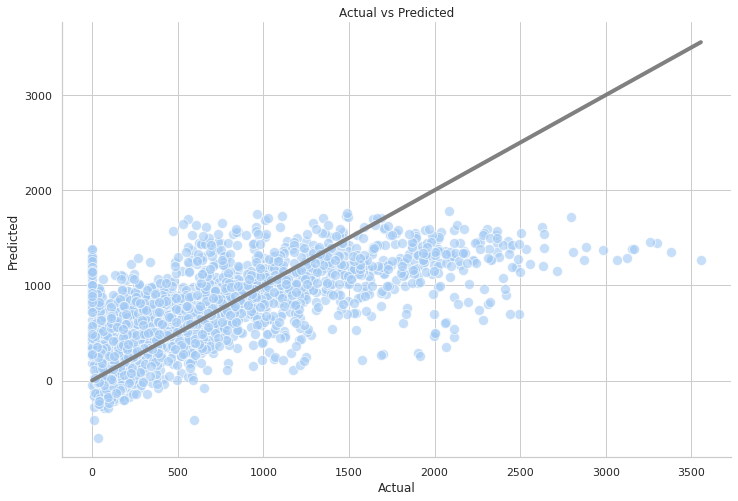

In [ ]:

fig,ax = plt.subplots(figsize=(12,8))

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_test_predict,
                s=100,
                alpha=0.6,
                linewidth=1,
                
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray', ax=ax)

sns.despine()

#SVR Regression

In [ ]:

model_grid=SVR(kernel='rbf')#.fit(X_train, y_train)
param={
    'C':[0.1,1,10,100], 
       'epsilon': np.linspace(0.01,10), 
       'gamma': ['scale', 'auto']
      }
grid_search=GridSearchCV(model_grid,param,cv=3, n_jobs=1, verbose=0, return_train_score=False)

In [ ]:
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'C': 100, 'epsilon': 10.0, 'gamma': 'auto'}
SVR(C=100, epsilon=10.0, gamma='auto')


In [ ]:
# model evaluation for testing set
y_test_predict = grid_search.predict(X_test)
r2_adj=1-(1-r2_score(y_test, y_test_predict))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)



print("The model performance for testing set")
print("--------------------------------------")
print('R²:',r2_score(y_test, y_test_predict))
print('Adjusted R²:',r2_adj)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:',metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print("\n")

The model performance for testing set
--------------------------------------
R²: 0.6242684163601797
Adjusted R²: 0.6228902170620969
MAE: 241.8063098894517
MSE: 153485.50074346323
RMSE: 391.7722562196859




In [ ]:

result.loc[len(result)]=['SVR',
                         r2_score(y_test, y_test_predict) ,
                         r2_adj,
                         metrics.mean_absolute_error(y_test, y_test_predict),
                         metrics.mean_squared_error(y_test, y_test_predict), 
                         np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))]

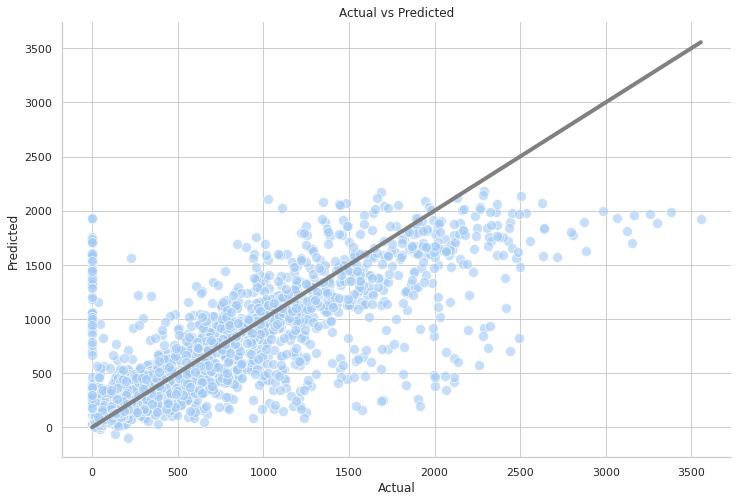

In [ ]:

fig,ax = plt.subplots(figsize=(12,8))

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_test_predict,
                s=100,
                alpha=0.6,
                linewidth=1,
                
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray', ax=ax)

sns.despine()

#Decision Tree (Regression)

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
decisionTree = DecisionTreeRegressor(min_samples_leaf=30)

param = {'max_depth' : [1,4,5,6,7,8,9,10,12,15,20]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train,y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,y_test)


In [ ]:

y_test_predict = gridSearch_decisionTree.predict(X_test)
r2_adj=1 - (1-r2_score(y_test, y_test_predict))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)

# model evaluation for testing set

print("The model performance for testing set")
print("--------------------------------------")
print('R²:',r2_score(y_test, y_test_predict))
print('Adjusted R²:',r2_adj)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:',metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

The model performance for testing set
--------------------------------------
R²: 0.7000264246015708
Adjusted R²: 0.6989261088733785
MAE: 215.2757996010372
MSE: 122538.525997247
RMSE: 350.05503281233797


In [ ]:

result.loc[len(result)]=['Regression Decision Tree',
                         r2_score(y_test, y_test_predict) ,
                         r2_adj,
                         metrics.mean_absolute_error(y_test, y_test_predict),
                         metrics.mean_squared_error(y_test, y_test_predict), 
                         np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))]

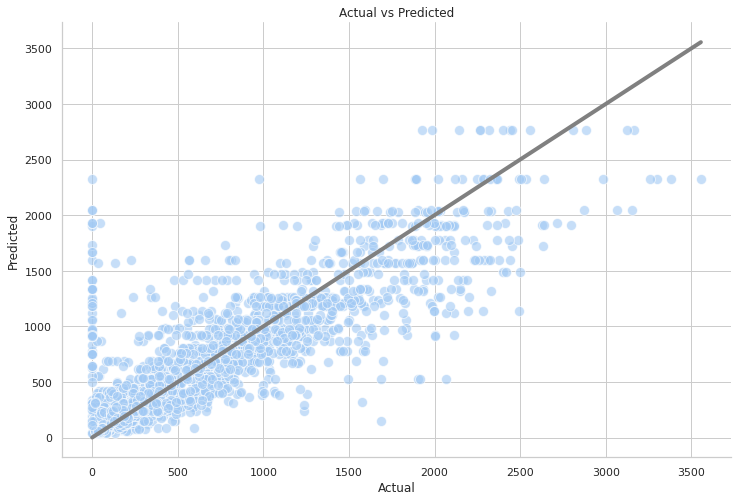

In [ ]:

fig,ax = plt.subplots(figsize=(12,8))

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_test_predict,
                s=100,
                alpha=0.6,
                linewidth=1,
                
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray', ax=ax)

sns.despine()

[1051 2102 3153 4204 5256]


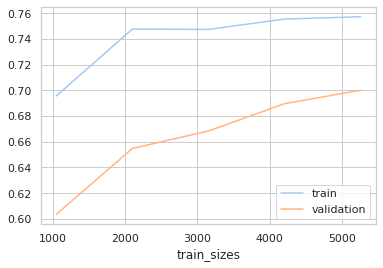

In [ ]:
train_sizes, train_scores, test_scores=learning_curve(best_DecisionTree,X_train,y_train,train_sizes=np.linspace(0.2,1.0,5), cv=5)
N=train_sizes
print(N)

plt.plot(N,train_scores.mean(axis=1),label='train')
plt.plot(N,test_scores.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()

# Random Forest (Regression)

In [58]:
RFR_model = RandomForestRegressor(n_estimators=100)

param = {'max_depth' : [60,70,80,90,100],'bootstrap' : [True,False] }

best_RandomForest=GridSearchCV(RFR_model,param,scoring='r2',cv=5)
best_RandomForest.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [60, 70, 80, 90, 100]},
             scoring='r2')

In [59]:


# model evaluation for testing set
y_test_predict =best_RandomForest.predict(X_test)
r2_adj=1 - (1-r2_score(y_test, y_test_predict))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)

print("The model performance for testing set")
print("--------------------------------------")
print('R²:',r2_score(y_test, y_test_predict))
print('Adjusted R²:',r2_adj)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:',metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print("\n")

The model performance for testing set
--------------------------------------
R²: 0.7392519723650361
Adjusted R²: 0.7382955376006712
MAE: 203.98526940639272
MSE: 110422.79256347033
RMSE: 332.29925152408987




In [60]:
result.loc[len(result)]=['Regression Random Forest',
                         r2_score(y_test, y_test_predict) ,
                         r2_adj,
                         metrics.mean_absolute_error(y_test, y_test_predict),
                         metrics.mean_squared_error(y_test, y_test_predict), 
                         np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))]

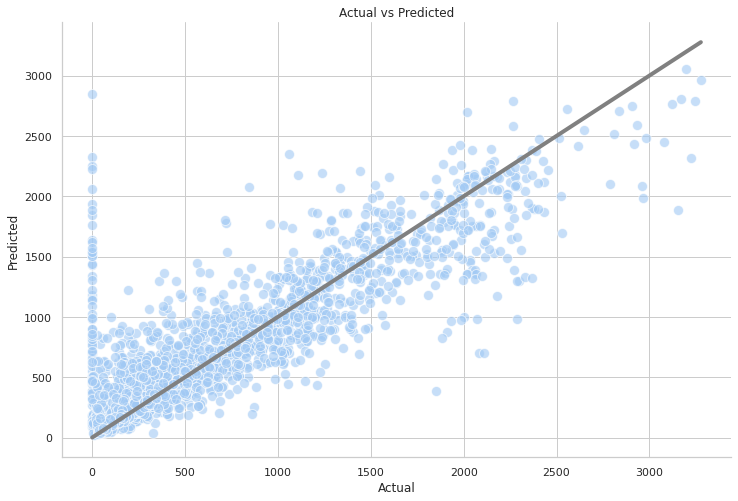

In [61]:

fig,ax = plt.subplots(figsize=(12,8))

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_test_predict,
                s=100,
                alpha=0.6,
                linewidth=1,
                
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray', ax=ax)

sns.despine()

#RIDGE

In [ ]:
ridge=Ridge()

parameters={'alpha':list(range(-300,300))}

gridSearchRidge=GridSearchCV(ridge,parameters,scoring='r2',cv=3)
gridSearchRidge.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [-300, -299, -298, -297, -296, -295, -294,
                                   -293, -292, -291, -290, -289, -288, -287,
                                   -286, -285, -284, -283, -282, -281, -280,
                                   -279, -278, -277, -276, -275, -274, -273,
                                   -272, -271, ...]},
             scoring='r2')

In [ ]:
best_ridge=gridSearchRidge.best_estimator_
bestridge_testScore=best_ridge.score(X_test,y_test)


In [ ]:


# model evaluation for testing set
y_test_predict =best_ridge.predict(X_test)
r2_adj=1 - (1-r2_score(y_test, y_test_predict))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)

print("The model performance for testing set")
print("--------------------------------------")
print('R²:',r2_score(y_test, y_test_predict))
print('Adjusted R²:',r2_adj)
print('MAE:',metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:',metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print("\n")

The model performance for testing set
--------------------------------------
R²: 0.4520752309139566
Adjusted R²: 0.45006541974812053
MAE: 351.49167974969384
MSE: 223826.02691589377
RMSE: 473.10255433245527




In [ ]:
result.loc[len(result)]=['Ridge',
                         r2_score(y_test, y_test_predict) ,
                         r2_adj,
                         metrics.mean_absolute_error(y_test, y_test_predict),
                         metrics.mean_squared_error(y_test, y_test_predict), 
                         np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))]

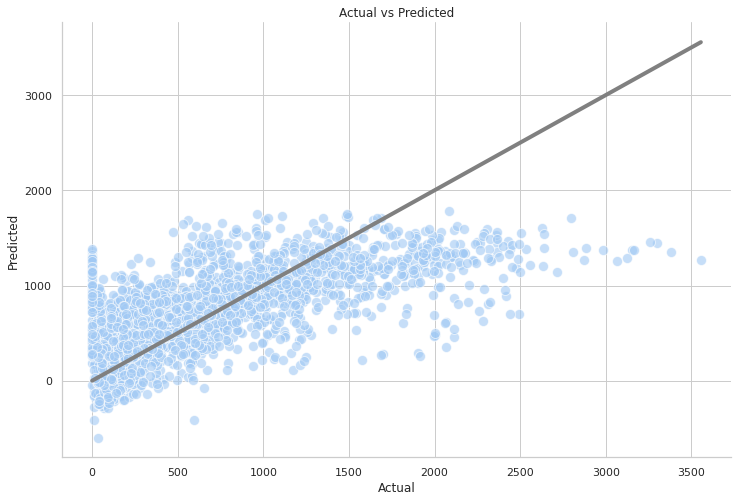

In [ ]:

fig,ax = plt.subplots(figsize=(12,8))

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_test_predict,
                s=100,
                alpha=0.6,
                linewidth=1,
                
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray', ax=ax)

sns.despine()

[1051 2102 3153 4204 5256]


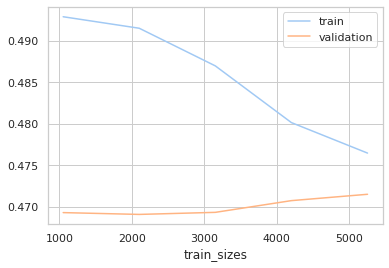

In [ ]:
train_sizes, train_scores, test_scores=learning_curve(best_ridge,X_train,y_train,train_sizes=np.linspace(0.2,1.0,5), cv=5)
N=train_sizes
print(N)

plt.plot(N,train_scores.mean(axis=1),label='train')
plt.plot(N,test_scores.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()

#Lasso

In [ ]:
lasso=Lasso()

parameters={'alpha':list(range(-300,300))}

gridSearchLasso=GridSearchCV(lasso,parameters,scoring='r2',cv=4)
gridSearchLasso.fit(X_train,y_train)


best_Lasso=gridSearchLasso.best_estimator_
bestLasso_testScore=best_Lasso.score(X_test,y_test)



In [ ]:

# model evaluation for testing set
y_test_predict = gridSearchLasso.predict(X_test)
r2=r2_score(y_test,y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('R²:',r2_score(y_test,y_test_predict))
print('Adjusted R²:',1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:',metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))


The model performance for testing set
--------------------------------------
R²: 0.4521492781344101
Adjusted R²: 0.45013973857690215
MAE: 351.1950519653732
MSE: 223795.77879408337
RMSE: 473.07058542471583


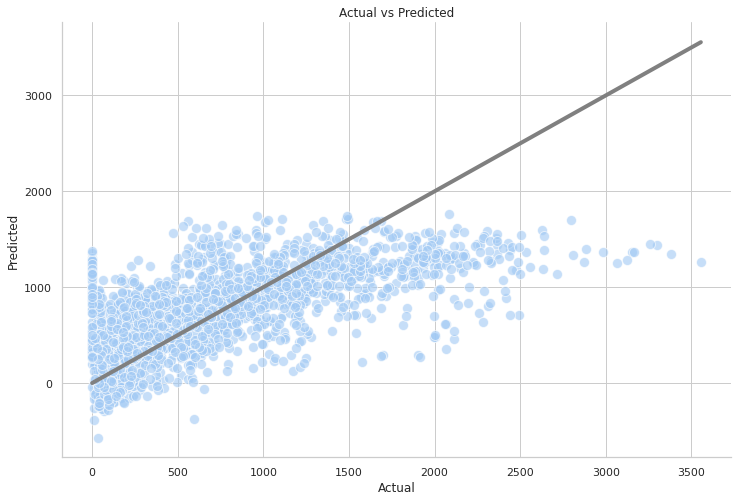

In [ ]:

fig,ax = plt.subplots(figsize=(12,8))

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_test_predict,
                s=100,
                alpha=0.6,
                linewidth=1,
                
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray', ax=ax)

sns.despine()

In [ ]:
result.loc[len(result)]=['Lasso',
                         r2_score(y_test, y_test_predict) ,
                         1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1),
                         metrics.mean_absolute_error(y_test, y_test_predict),
                         metrics.mean_squared_error(y_test, y_test_predict), 
                         np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))]

[1051 2102 3153 4204 5256]


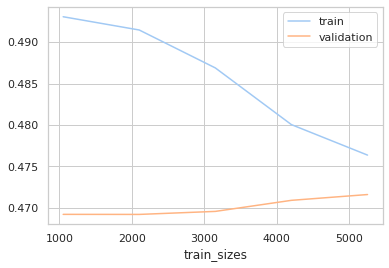

In [ ]:
train_sizes, train_scores, test_scores=learning_curve(best_Lasso,X_train,y_train,train_sizes=np.linspace(0.2,1.0,5), cv=5)
N=train_sizes
print(N)

plt.plot(N,train_scores.mean(axis=1),label='train')
plt.plot(N,test_scores.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()

#KNN

In [ ]:
knn_model = KNeighborsRegressor()
    
param = {'n_neighbors' : [1,4,5,6,7,8,9,10,12,15,20]}

gridSearch_knn=GridSearchCV(knn_model,param,scoring='r2',cv=6)
gridSearch_knn.fit(X_train,y_train)


best_knn=gridSearch_knn.best_estimator_
bestknn_testScore=best_knn.score(X_test,y_test)


In [ ]:
# model evaluation for testing set
y_test_predict = gridSearch_knn.predict(X_test)
r2=r2_score(y_test,y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('R²:',r2_score(y_test,y_test_predict))
print('Adjusted R²:',1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:',metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print("\n")

The model performance for testing set
--------------------------------------
R²: 0.6764898027902617
Adjusted R²: 0.6753031537404324
MAE: 232.72293252156268
MSE: 132153.18268786286
RMSE: 363.5287921029954




In [ ]:
result.loc[len(result)]=['KNN',
                         r2_score(y_test, y_test_predict) ,
                         1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1),
                         metrics.mean_absolute_error(y_test, y_test_predict),
                         metrics.mean_squared_error(y_test, y_test_predict), 
                         np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))]

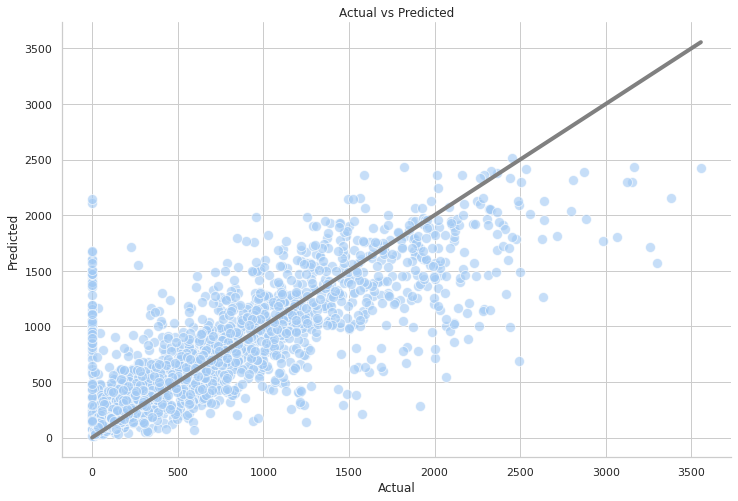

In [ ]:

fig,ax = plt.subplots(figsize=(12,8))

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_test_predict,
                s=100,
                alpha=0.6,
                linewidth=1,
                
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray', ax=ax)

sns.despine()

[1051 2102 3153 4204 5256]


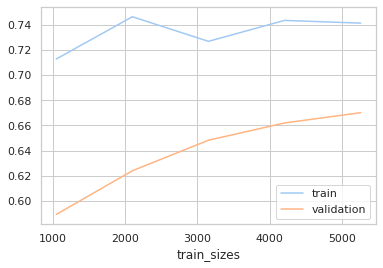

In [ ]:

train_sizes, train_scores, test_scores=learning_curve(gridSearch_knn,X_train,y_train,train_sizes=np.linspace(0.2,1.0,5), cv=5)
N=train_sizes
print(N)

plt.plot(N,train_scores.mean(axis=1),label='train')
plt.plot(N,test_scores.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()

## Results

In [62]:
res=result.sort_values(by=['R_2'], ascending=False)
res

Model       R_2  Adjusted_R_2         MAE  \
0  Regression Random Forest  0.739252      0.738296  203.985269   

             MSE        RMSE  
0  110422.792563  332.299252

In [63]:
res[['Model','R_2','Adjusted_R_2']].style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

#API

On utilise pickle sur le model avec le meilleur R² dans le but de d'implémenter l'API.

In [64]:
import pickle

In [65]:
pickle.dump(best_RandomForest, open("model.pkl",'wb'))

In [66]:
model = pickle.load(open("model.pkl",'rb'))